<a href="https://colab.research.google.com/github/sohyeon98720/doitDeeplearning/blob/master/doitDeeplearning_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 5강 - 4강과 같은 데이터셋 사용
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

cancer=load_breast_cancer()
x=cancer.data
y=cancer.target

x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)

sgd=SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.8333333333333334

In [2]:
# 다른 손실함수 적용
sgd=SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.9385964912280702

In [0]:
# train, val, test set나누기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
x=cancer.data
y=cancer.target

x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)

In [5]:
# 데이터의 갯수 확인하기
print(len(x_train),len(x_val),len(x_test))

364 91 114


In [6]:
sgd=SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)

0.6923076923076923

In [7]:
print(cancer.feature_names[[2,3]])

['mean perimeter' 'mean area']


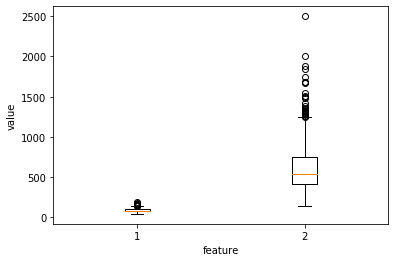

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()
# 데이터의 범위 차이가 많이 남

In [0]:
# 4강의 singleLayer에서 발전된 형태
class singleLayer2:

  def __init__(self,learning_rate=0.1):
    self.w=None
    self.b=None
    self.losses=[]
    self.w_history=[]
    self.lr=learning_rate

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad
  
  def add_bias(self,x):
    return np.c_[np.ones((x.shape[0])),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=-(y[i]-a)
        w_grad,b_grad=self.backprop(x[i],err)
        self.w-=self.lr*w_grad
        self.b-=b_grad
        self.w_history.append(self.w.copy())
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
  
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)

In [10]:
import numpy as np
layer1=singleLayer2()
layer1.fit(x_train,y_train)
layer1.score(x_val,y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.9120879120879121

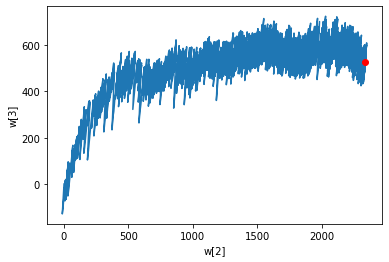

In [11]:
w2=[]
w3=[]
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')#최종 가중치
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

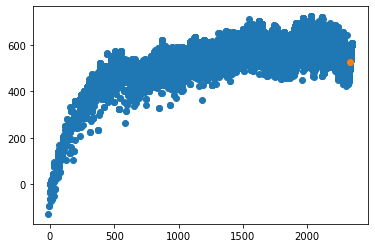

In [12]:
# 위와 같은 데이터를 나타내는 그래프이지만 형태가 다름
plt.scatter(w2,w3)
plt.scatter(w2[-1],w3[-1])
plt.show()

In [0]:
# 특징의 스케일 조정하는 과정
import numpy as np
train_mean=np.mean(x_train,axis=0)
train_std=np.std(x_train,axis=0)
x_train_scaled=(x_train-train_mean)/train_std

In [14]:
print(x_train.shape)
print(train_mean.shape)

(364, 30)
(30,)


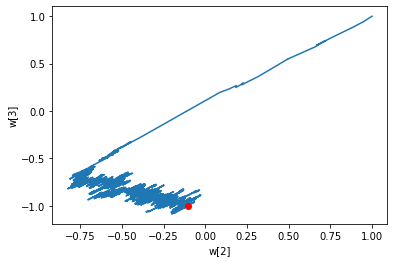

In [15]:
# ln[11],ln[12]와는 다른 그래프형태를 보임
layer2=singleLayer2()
layer2.fit(x_train_scaled,y_train)
w2=[]
w3=[]
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [16]:
layer2.score(x_val,y_val)
# 그런데 정확도가 현저히 낮음.
# why? val set의 스케일은 조정을 하지 안했기때문

0.37362637362637363

In [17]:
# 위의 문제점을 개선
# ln[13]과 비교
val_mean=np.mean(x_val,axis=0)
val_std=np.std(x_val,axis=0)
x_val_scaled=(x_val-val_mean)/val_std
layer2.score(x_val_scaled,y_val)

0.967032967032967

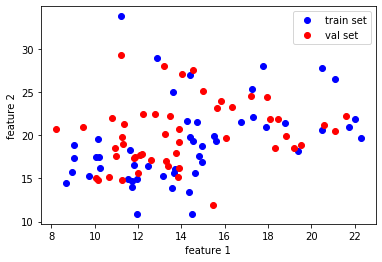

In [18]:
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val set'])
plt.show()

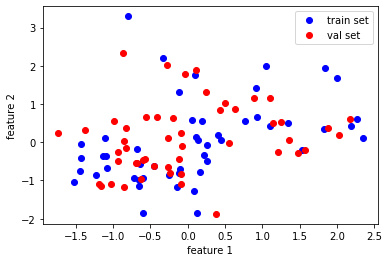

In [19]:
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val set'])
plt.show()
# 그래프 두개를 비교해보면 미세하게 다른 부분이 있음
# why? 다른 비율로 전처리했기 때문.

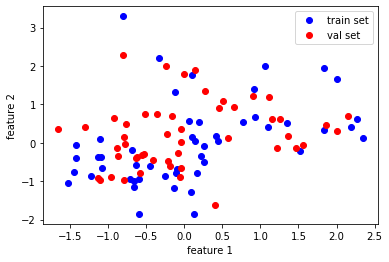

In [20]:
# 위의 문제를 개선
x_val_scaled=(x_val-train_mean)/train_std
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val set'])
plt.show()

In [21]:
layer2.score(x_val_scaled,y_val)

0.967032967032967

In [0]:
# underfitting과 overfitting파트
# underfitting/overfitting인지 알아내기 위해 val set도 손실을 저장해주는 변수를 만듦
class singleLayer3:

  def __init__(self,learning_rate=0.1):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history=[]
    self.lr=learning_rate

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad
  
  def add_bias(self,x):
    return np.c_[np.ones((x.shape[0])),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return
    val_loss=0
    for i in range(len(x_val)):
      z=self.forpass(x_val[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss+=-(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=-(y[i]-a)
        w_grad,b_grad=self.backprop(x[i],err)
        self.w-=self.lr*w_grad
        self.b-=b_grad
        self.w_history.append(self.w.copy())
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)
  
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)

In [25]:
layer3=singleLayer3()
layer3.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)
layer3.score(x_val_scaled,y_val)

0.967032967032967

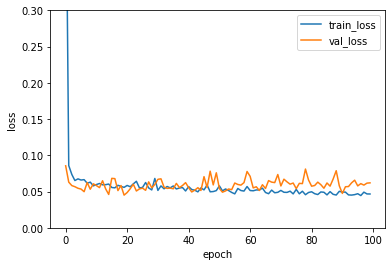

In [24]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [26]:
# 위의 그래프를 보면 epoch=20 부터는 학습이 필요없음 -> epoch=20으로 줄임
layer4=singleLayer3()
layer4.fit(x_train_scaled,y_train,epochs=20)
layer4.score(x_val_scaled,y_val)

0.978021978021978

In [0]:
# L1/L2 normalization 파트
class singleLayer4:

  def __init__(self,learning_rate=0.1,l1=0,l2=0):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history=[]
    self.lr=learning_rate
    self.l1=l1
    self.l2=l2

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad
  
  def add_bias(self,x):
    return np.c_[np.ones((x.shape[0])),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return
    val_loss=0
    for i in range(len(x_val)):
      z=self.forpass(x_val[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss+=-(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=-(y[i]-a)
        w_grad,b_grad=self.backprop(x[i],err)
        w_grad+=self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w-=self.lr*w_grad
        self.b-=b_grad
        self.w_history.append(self.w.copy())
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)

  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)

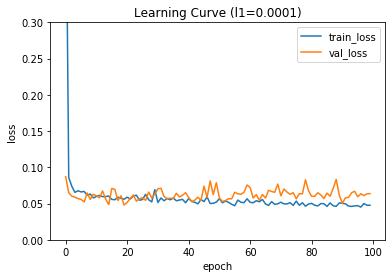

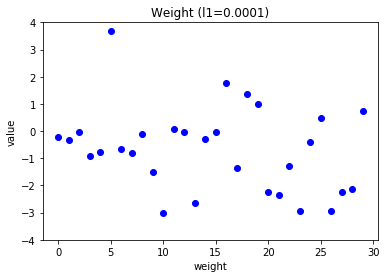

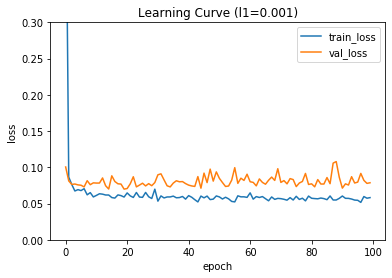

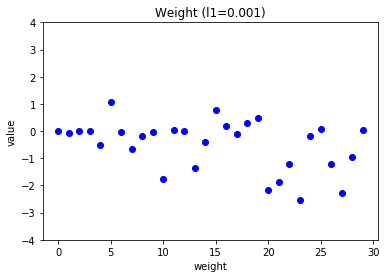

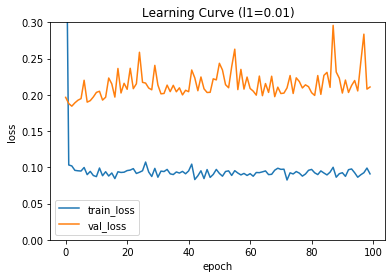

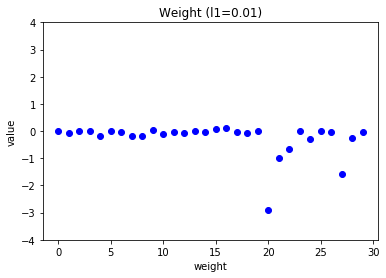

In [28]:
l1_list=[0.0001,0.001,0.01]
for l1 in l1_list:
  lyr=singleLayer4(l1=l1)
  lyr.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,0.3)
  plt.show()

  plt.plot(lyr.w,'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()

In [29]:
layer5=singleLayer4(l1=0.001)
layer5.fit(x_train_scaled,y_train,epochs=20)
layer5.score(x_val_scaled,y_val)

0.978021978021978

In [30]:
np.sum(layer5.predict(x_val_scaled)==y_val)

89

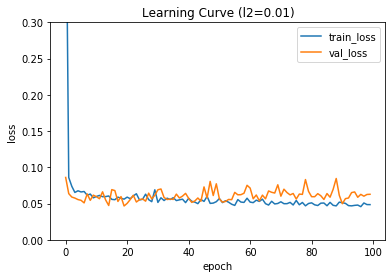

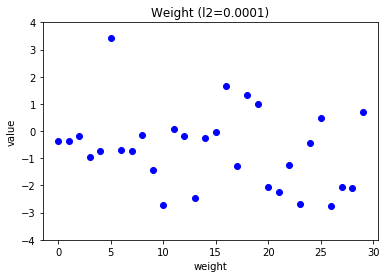

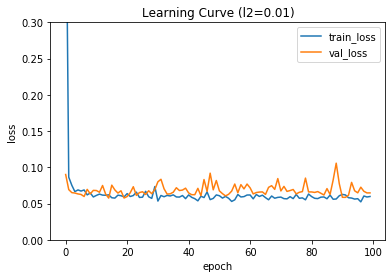

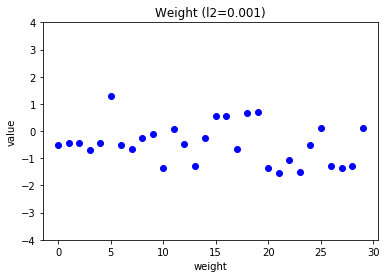

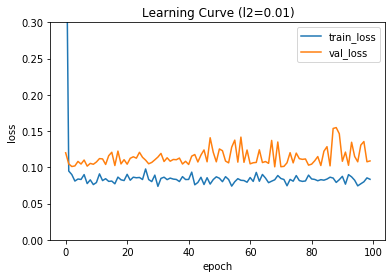

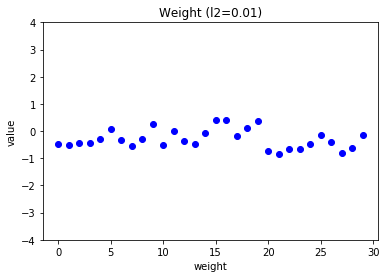

In [31]:
l2_list=[0.0001,0.001,0.01]
for l2 in l2_list:
  lyr=singleLayer4(l2=l2)
  lyr.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,0.3)
  plt.show()

  plt.plot(lyr.w,'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()

In [32]:
layer6=singleLayer4(l2=0.01)
layer6.fit(x_train_scaled,y_train,epochs=50)
layer6.score(x_val_scaled,y_val)

0.978021978021978

In [33]:
np.sum(layer6.predict(x_val_scaled)==y_val)

89

In [34]:
# 위의 내용을 sgd모듈로 구현(penalty)
sgd=SGDClassifier(loss='log',penalty='l2',alpha=0.001,random_state=42)
sgd.fit(x_train_scaled,y_train)
sgd.score(x_val_scaled,y_val)

0.978021978021978